# Pandas Lab 

Lab Advisor: Pichaya Tandayya

Phuket Advisor: Kullawat Chaowanawatee

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive.mount("/content/drive", force_remount=True)



## Getting Started

Let's give it a try on Pandas. 

## Header

This part is the header of the code. Favorite import aliases for the lab are as follows. This will be very useful for speed coding.

In [0]:
#!/usr/bin/env python3
#-*- coding: utf-8 -*-

In [1]: import pandas as pd

In [2]: import numpy as np

In [3]: import matplotlib.pyplot as plt

## Object Creation

See the [Data Structure](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro
) Intro section.
Creating a [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series), s, by passing a list of values, letting pandas create a default integer index:


In [3]:
In [4]: s = pd.Series([1,3,5,np.nan,6,8])
In [5]: s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame
) by passing a NumPy array, with a datetime index and labeled columns:

The first example shows how to create an datetime index, dates, containing 6 records of datetime data.

In [4]:
In [6]: dates = pd.date_range('20180101', periods=6)

In [7]: dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

The second example shows how to crate a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), df, applying randomization and labled columns. It also uses the first [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), dates, as the row index.

In [5]:
In [8]: df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]: df

,A,B,C,D
2018-01-01,0.713446,-0.669939,-0.882033,0.681890
2018-01-02,0.909165,1.054943,1.176734,-0.126298
2018-01-03,-0.918895,-1.086045,0.332080,0.398574
2018-01-04,0.486462,0.761736,0.215933,-0.814376
2018-01-05,1.182930,0.750854,0.410428,-1.930758
2018-01-06,-0.510605,-0.589055,0.302320,-0.780428


Display the shape of the data (no. of rows, no. of columns)

In [6]:
print(df.shape)

(6, 4)


Display the size of the data (total number of items)

In [7]:
print(df.size)

24


Display the number of dimensions of the data

In [8]:
print(df.ndim)

2


Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame
), df2,  by passing a dict of objects that can be converted to series-like.

In [10]:
In [10]: df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20180102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 

In [11]: df2

,A,B,C,D,E,F
0,1.0,2018-01-02,1.0,3,test,foo
1,1.0,2018-01-02,1.0,3,train,foo
2,1.0,2018-01-02,1.0,3,test,foo
3,1.0,2018-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [11]:
In [12]: df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

##Viewing Data
See the [Basics section.](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics
)
Here is how to view the top and bottom rows of the frame:


In [12]:
In [14]: df.head()

,A,B,C,D
2018-01-01,0.713446,-0.669939,-0.882033,0.681890
2018-01-02,0.909165,1.054943,1.176734,-0.126298
2018-01-03,-0.918895,-1.086045,0.332080,0.398574
2018-01-04,0.486462,0.761736,0.215933,-0.814376
2018-01-05,1.182930,0.750854,0.410428,-1.930758


In [13]:
In [15]: df.tail(3)

,A,B,C,D
2018-01-04,0.486462,0.761736,0.215933,-0.814376
2018-01-05,1.182930,0.750854,0.410428,-1.930758
2018-01-06,-0.510605,-0.589055,0.302320,-0.780428


Display the index, columns, and the underlying NumPy data:

In [14]:
In [16]: df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
In [17]: df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
In [18]: df.values

array([[ 0.71344649, -0.66993878, -0.88203271,  0.68188956],
       [ 0.90916452,  1.05494306,  1.17673411, -0.12629816],
       [-0.918895  , -1.08604472,  0.33208035,  0.39857409],
       [ 0.48646153,  0.76173559,  0.21593334, -0.81437627],
       [ 1.18292981,  0.75085439,  0.41042778, -1.93075824],
       [-0.51060487, -0.58905454,  0.30232033, -0.78042821]])

describe() shows a quick statistic summary of your data:

In [17]:
In [19]: df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.310417,0.037082,0.259244,-0.428566
std,0.836479,0.919127,0.659726,0.952667
min,-0.918895,-1.086045,-0.882033,-1.930758
25%,-0.261338,-0.649718,0.237530,-0.805889
50%,0.599954,0.080900,0.317200,-0.453363
75%,0.860235,0.759015,0.390841,0.267356
max,1.182930,1.054943,1.176734,0.681890


Transposing your data:

In [18]:
In [20]: df.T

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06
A,0.713446,0.909165,-0.918895,0.486462,1.182930,-0.510605
B,-0.669939,1.054943,-1.086045,0.761736,0.750854,-0.589055
C,-0.882033,1.176734,0.332080,0.215933,0.410428,0.302320
D,0.681890,-0.126298,0.398574,-0.814376,-1.930758,-0.780428


Sorting by an axis:

In [20]:
In [21]: df.sort_index(axis=1, ascending=False)

,D,C,B,A
2018-01-01,0.681890,-0.882033,-0.669939,0.713446
2018-01-02,-0.126298,1.176734,1.054943,0.909165
2018-01-03,0.398574,0.332080,-1.086045,-0.918895
2018-01-04,-0.814376,0.215933,0.761736,0.486462
2018-01-05,-1.930758,0.410428,0.750854,1.182930
2018-01-06,-0.780428,0.302320,-0.589055,-0.510605


Sorting by values:

In [21]:
In [22]: df.sort_values(by='B')

,A,B,C,D
2018-01-03,-0.918895,-1.086045,0.332080,0.398574
2018-01-01,0.713446,-0.669939,-0.882033,0.681890
2018-01-06,-0.510605,-0.589055,0.302320,-0.780428
2018-01-05,1.182930,0.750854,0.410428,-1.930758
2018-01-04,0.486462,0.761736,0.215933,-0.814376
2018-01-02,0.909165,1.054943,1.176734,-0.126298


## Selection
*Note* While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code,  the optimized pandas data access methods, .at, .iat, .loc and .iloc are recommended.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing
) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced
).

###Getting
Selecting a single column, which yields a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), equivalent to df.A:

In [22]:
In [23]: df['A']

2018-01-01    0.713446
2018-01-02    0.909165
2018-01-03   -0.918895
2018-01-04    0.486462
2018-01-05    1.182930
2018-01-06   -0.510605
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.


Selecting the rows (no. 0 - 2).

In [23]:
In [24]: df[0:3]

,A,B,C,D
2018-01-01,0.713446,-0.669939,-0.882033,0.681890
2018-01-02,0.909165,1.054943,1.176734,-0.126298
2018-01-03,-0.918895,-1.086045,0.332080,0.398574


Selecting rows from a selected datetime to another.

In [24]:
In [25]: df['20180102':'20180104']

,A,B,C,D
2018-01-02,0.909165,1.054943,1.176734,-0.126298
2018-01-03,-0.918895,-1.086045,0.332080,0.398574
2018-01-04,0.486462,0.761736,0.215933,-0.814376


###Selection by Label
See more in Selection by Label. 
Access a group of rows and columns by label(s) or a boolean array with "loc".

For getting a cross section using a label:

In [25]:
In [26]: df.loc[dates[0]]

A    0.713446
B   -0.669939
C   -0.882033
D    0.681890
Name: 2018-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [26]:
In [27]: df.loc[:,['A','B']]

,A,B
2018-01-01,0.713446,-0.669939
2018-01-02,0.909165,1.054943
2018-01-03,-0.918895,-1.086045
2018-01-04,0.486462,0.761736
2018-01-05,1.182930,0.750854
2018-01-06,-0.510605,-0.589055


Showing label slicing, both endpoints are included:

In [27]:
In [28]: df.loc['20180102':'20180104',['A','B']]

,A,B
2018-01-02,0.909165,1.054943
2018-01-03,-0.918895,-1.086045
2018-01-04,0.486462,0.761736


Reduction in the dimensions of the returned object:

In [28]:
In [29]: df.loc['20180102',['A','B']]

A    0.909165
B    1.054943
Name: 2018-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [29]:
In [30]: df.loc[dates[0],'A']

0.7134464939934588

For getting fast access to a scalar (equivalent to the prior method) with "at":

In [30]:
In [31]: df.at[dates[0],'A']

0.7134464939934588

###Selection by Position
See more in [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer
). Purely integer-location based indexing for selection by position with "iloc".

Select via the position of the passed integers:

In [31]:
In [32]: df.iloc[3]

A    0.486462
B    0.761736
C    0.215933
D   -0.814376
Name: 2018-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [32]:
In [33]: df.iloc[3:5,0:2]

,A,B
2018-01-04,0.486462,0.761736
2018-01-05,1.182930,0.750854


By lists of integer position locations, similar to the numpy/python style:

In [33]:
In [34]: df.iloc[[1,2,4],[0,2]]

,A,C
2018-01-02,0.909165,1.176734
2018-01-03,-0.918895,0.332080
2018-01-05,1.182930,0.410428


For slicing rows explicitly:

In [34]:
In [35]: df.iloc[1:3,:]

,A,B,C,D
2018-01-02,0.909165,1.054943,1.176734,-0.126298
2018-01-03,-0.918895,-1.086045,0.332080,0.398574


For slicing columns explicitly:

In [35]:
In [36]: df.iloc[:,1:3]

,B,C
2018-01-01,-0.669939,-0.882033
2018-01-02,1.054943,1.176734
2018-01-03,-1.086045,0.332080
2018-01-04,0.761736,0.215933
2018-01-05,0.750854,0.410428
2018-01-06,-0.589055,0.302320


For getting a value explicitly:

In [36]:
In [37]: df.iloc[1,1]

1.0549430550413736

For getting fast access to a scalar (equivalent to the prior method):

In [37]:
In [38]: df.iat[1,1]

1.0549430550413736

###Boolean Indexing
Using a single column’s values to select data.

In [0]:
In [39]: df[df.A > 0]

,A,B,C,D
2018-01-02,0.479774,-1.238276,0.029123,-1.469268
2018-01-04,0.885615,-0.421063,-0.857950,0.551719


Selecting values from a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) where a boolean condition is met.

In [0]:
In [40]: df[df > 0]

,A,B,C,D
2000-01-01,0.130623,NaN,1.326729,0.752609
2000-01-02,NaN,NaN,2.063317,NaN
2000-01-03,NaN,NaN,1.520695,0.282877
2000-01-04,NaN,NaN,0.757260,1.475070
2000-01-05,NaN,NaN,NaN,1.181187
...,...,...,...,...
2002-09-22,44.003564,NaN,15.554948,25.011009
2002-09-23,43.156580,NaN,13.760315,24.470874
2002-09-24,44.802496,NaN,14.682996,25.399064
2002-09-25,45.501537,NaN,12.881077,25.045453


Using the isin() method for filtering:

Copy the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), df, to df2. Add another column containing a number-in-word llist.

In [0]:
In [41]: df2 = df.copy()

In [42]: df2['E'] = ['one', 'one','two','three','four','three']

In [43]: df2

,A,B,C,D,E
2018-01-01,-1.137300,-0.568082,-0.975429,1.138160,one
2018-01-02,0.479774,-1.238276,0.029123,-1.469268,one
2018-01-03,-0.029711,-0.457989,0.638783,-1.033093,two
2018-01-04,0.885615,-0.421063,-0.857950,0.551719,three
2018-01-05,-0.831932,-0.179667,-0.307842,1.521337,four
2018-01-06,-1.266098,1.292000,0.530187,-1.012377,three


Using the isin() method for filtering data indicated by the newly added column:

In [0]:
In [44]: df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2018-01-03,-0.029711,-0.457989,0.638783,-1.033093,two
2018-01-05,-0.831932,-0.179667,-0.307842,1.521337,four


###Setting
Setting a new column automatically aligns the data by the indexes:

Creating a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), s1, aligns with the df's datetime index. 

In [0]:
In [45]: s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180102', periods=6))

In [46]: s1

2018-01-02    1
2018-01-03    2
2018-01-04    3
2018-01-05    4
2018-01-06    5
2018-01-07    6
Freq: D, dtype: int64

Add a new column 'F' from s1 into df.

In [0]:
In [47]: df['F'] = s1
In [48]: df

,A,B,C,D,F
2018-01-01,-1.137300,-0.568082,-0.975429,1.138160,NaN
2018-01-02,0.479774,-1.238276,0.029123,-1.469268,1.0
2018-01-03,-0.029711,-0.457989,0.638783,-1.033093,2.0
2018-01-04,0.885615,-0.421063,-0.857950,0.551719,3.0
2018-01-05,-0.831932,-0.179667,-0.307842,1.521337,4.0
2018-01-06,-1.266098,1.292000,0.530187,-1.012377,5.0


Setting values by label:

Setting a value by accessing a row/column label pair with "at".

In [0]:
In [48]: df.at[dates[0],'A'] = 1
In [48]: df

,A,B,C,D,F
2018-01-01,1.000000,-0.568082,-0.975429,1.138160,NaN
2018-01-02,0.479774,-1.238276,0.029123,-1.469268,1.0
2018-01-03,-0.029711,-0.457989,0.638783,-1.033093,2.0
2018-01-04,0.885615,-0.421063,-0.857950,0.551719,3.0
2018-01-05,-0.831932,-0.179667,-0.307842,1.521337,4.0
2018-01-06,-1.266098,1.292000,0.530187,-1.012377,5.0


Setting values by  an integer position or  row/column pair with "iat":

In [0]:
In [49]: df.iat[0,1] = 2
In [48]: df

,A,B,C,D,F
2018-01-01,1.000000,2.000000,-0.975429,1.138160,NaN
2018-01-02,0.479774,-1.238276,0.029123,-1.469268,1.0
2018-01-03,-0.029711,-0.457989,0.638783,-1.033093,2.0
2018-01-04,0.885615,-0.421063,-0.857950,0.551719,3.0
2018-01-05,-0.831932,-0.179667,-0.307842,1.521337,4.0
2018-01-06,-1.266098,1.292000,0.530187,-1.012377,5.0


Setting by assigning with a NumPy array:

In [0]:
In [50]: df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [0]:
In [51]: df

,A,B,C,D,F
2018-01-01,1.000000,2.000000,-0.975429,5,NaN
2018-01-02,0.479774,-1.238276,0.029123,5,1.0
2018-01-03,-0.029711,-0.457989,0.638783,5,2.0
2018-01-04,0.885615,-0.421063,-0.857950,5,3.0
2018-01-05,-0.831932,-0.179667,-0.307842,5,4.0
2018-01-06,-1.266098,1.292000,0.530187,5,5.0


A where operation with setting.

In [0]:
In [52]: df2 = df.copy()

In [53]: df2[df2 > 0] = -df2

In [54]: df2

,A,B,C,D,F
2018-01-01,-1.000000,-2.000000,-0.975429,-5,NaN
2018-01-02,-0.479774,-1.238276,-0.029123,-5,-1.0
2018-01-03,-0.029711,-0.457989,-0.638783,-5,-2.0
2018-01-04,-0.885615,-0.421063,-0.857950,-5,-3.0
2018-01-05,-0.831932,-0.179667,-0.307842,-5,-4.0
2018-01-06,-1.266098,-1.292000,-0.530187,-5,-5.0


##Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [0]:
In [55]: df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [56]: df1.loc[dates[0]:dates[1],'E'] = 1

In [57]: df1

,A,B,C,D,F,E
2018-01-01,1.000000,2.000000,-0.975429,5,NaN,1.0
2018-01-02,0.479774,-1.238276,0.029123,5,1.0,1.0
2018-01-03,-0.029711,-0.457989,0.638783,5,2.0,NaN
2018-01-04,0.885615,-0.421063,-0.857950,5,3.0,NaN


To drop any rows that have missing data.

In [0]:
In [58]: df1.dropna(how='any')

,A,B,C,D,F,E
2018-01-02,0.479774,-1.238276,0.029123,5,1.0,1.0


Filling missing data.

In [0]:
In [59]: df1.fillna(value=5)

,A,B,C,D,F,E
2018-01-01,1.000000,2.000000,-0.975429,5,5.0,1.0
2018-01-02,0.479774,-1.238276,0.029123,5,1.0,1.0
2018-01-03,-0.029711,-0.457989,0.638783,5,2.0,5.0
2018-01-04,0.885615,-0.421063,-0.857950,5,3.0,5.0


To get the boolean mask where values are nan.

In [0]:
In [60]: pd.isna(df1)

,A,B,C,D,F,E
2018-01-01,False,False,False,False,True,False
2018-01-02,False,False,False,False,False,False
2018-01-03,False,False,False,False,False,True
2018-01-04,False,False,False,False,False,True


##Operations
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop).

###Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [0]:
In [61]: df.mean()

A    0.039608
B    0.165834
C   -0.157188
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [0]:
In [62]: df.mean(1)

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

Creating a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), s, with the datetime index, dates.

In [0]:
In [63]: s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [64]: s

2018-01-01    NaN
2018-01-02    NaN
2018-01-03    1.0
2018-01-04    3.0
2018-01-05    5.0
2018-01-06    NaN
Freq: D, dtype: float64

Return Subtraction of series and other, element-wise (binary operator sub) with the method "sub".

In [0]:
In [65]: df.sub(s, axis='index')

,A,B,C,D,F
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-1.029711,-1.457989,-0.361217,4.0,1.0
2018-01-04,-2.114385,-3.421063,-3.857950,2.0,0.0
2018-01-05,-5.831932,-5.179667,-5.307842,0.0,-1.0
2018-01-06,NaN,NaN,NaN,NaN,NaN


Compare the results to the old df values.

In [0]:
df

,A,B,C,D,F
2018-01-01,1.000000,2.000000,-0.975429,5,NaN
2018-01-02,0.479774,-1.238276,0.029123,5,1.0
2018-01-03,-0.029711,-0.457989,0.638783,5,2.0
2018-01-04,0.885615,-0.421063,-0.857950,5,3.0
2018-01-05,-0.831932,-0.179667,-0.307842,5,4.0
2018-01-06,-1.266098,1.292000,0.530187,5,5.0


###Apply
Applying functions to the data:

Apply a function along an axis of the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
The function "[cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)" in numpy computes the cumulative sum of array elements over a given axis.

In [0]:
In [66]: df.apply(np.cumsum)

,A,B,C,D,F
2018-01-01,1.000000,2.000000,-0.975429,5,NaN
2018-01-02,1.479774,0.761724,-0.946307,10,1.0
2018-01-03,1.450063,0.303735,-0.307524,15,3.0
2018-01-04,2.335677,-0.117329,-1.165474,20,6.0
2018-01-05,1.503745,-0.296995,-1.473316,25,10.0
2018-01-06,0.237648,0.995004,-0.943129,30,15.0


In Python, an anonymous function can be created with the [lambda ](https://realpython.com/python-lambda/#python-lambda-and-regular-functions)keyword. More loosely, it may or not be assigned a name.

In [0]:
In [67]: df.apply(lambda x: x.max() - x.min())

A    2.266098
B    3.238276
C    1.614212
D    0.000000
F    4.000000
dtype: float64

###Histogramming
See more at Histogramming and Discretization.

In [0]:
In [68]: s = pd.Series(np.random.randint(0, 7, size=10))

In [69]: s

0    4
1    6
2    6
3    1
4    4
5    2
6    4
7    2
8    4
9    6
dtype: int64

Using the method "value_counts()" in a Series to return a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) containing unique values.

In [0]:
In [70]: s.value_counts()

4    4
6    3
2    2
1    1
dtype: int64

###String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expression](https://docs.python.org/3/library/re.html)s by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

Creating a new Series, s, and apply the method "str.lower()" to show the result in a lower-case style.

In [0]:
In [71]: s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [72]: s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

##Merge
###Concat
pandas provides various facilities for easily combining together [Series](https://pandas.pydata.org/pandas-docs/version/0.24/reference/series.html), [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), and [Panel](https://pandas.pydata.org/pandas-docs/version/0.24/reference/panel.html) objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging)).

Concatenating pandas objects together with concat():

In [0]:
s1 = pd.Series(['a', 'b'])


In [0]:
s1

0    a
1    b
dtype: object

In [0]:
s2 = pd.Series(['c', 'd'])

In [0]:
s2

0    c
1    d
dtype: object

In [0]:
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

Clear the existing index and reset it in the result by setting the ignore_index option to True.

In [0]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [0]:
In [73]: df = pd.DataFrame(np.random.randn(10, 4))

In [74]: df

,0,1,2,3
0,0.456051,0.262046,-0.925936,1.262128
1,0.989137,-0.849056,0.750327,-1.344489
2,1.235902,2.357381,-0.843451,-1.243680
3,-0.094860,-0.259607,0.603415,1.720412
4,0.379869,0.642509,-0.337697,-1.229977
5,-0.025031,-0.288283,-0.280041,1.411960
6,2.062748,0.891875,-0.143598,-0.651114
7,0.964278,1.257117,2.033952,-2.372000
8,0.739617,-1.241053,0.532078,-0.043317
9,0.136403,-0.664342,-1.478191,2.568865


Break it into pieces and remerged.

In [0]:
pieces1 = [df[:3], df[3:7], df[7:]]

In [0]:
pieces1

[          0         1         2         3
 0  0.456051  0.262046 -0.925936  1.262128
 1  0.989137 -0.849056  0.750327 -1.344489
 2  1.235902  2.357381 -0.843451 -1.243680,
           0         1         2         3
 3 -0.094860 -0.259607  0.603415  1.720412
 4  0.379869  0.642509 -0.337697 -1.229977
 5 -0.025031 -0.288283 -0.280041  1.411960
 6  2.062748  0.891875 -0.143598 -0.651114,
           0         1         2         3
 7  0.964278  1.257117  2.033952 -2.372000
 8  0.739617 -1.241053  0.532078 -0.043317
 9  0.136403 -0.664342 -1.478191  2.568865]

In [0]:
pd.concat(pieces1)


,0,1,2,3
0,0.456051,0.262046,-0.925936,1.262128
1,0.989137,-0.849056,0.750327,-1.344489
2,1.235902,2.357381,-0.843451,-1.243680
3,-0.094860,-0.259607,0.603415,1.720412
4,0.379869,0.642509,-0.337697,-1.229977
5,-0.025031,-0.288283,-0.280041,1.411960
6,2.062748,0.891875,-0.143598,-0.651114
7,0.964278,1.257117,2.033952,-2.372000
8,0.739617,-1.241053,0.532078,-0.043317
9,0.136403,-0.664342,-1.478191,2.568865


In [0]:
pieces2 = [df[:3],  df[7:]]
pd.concat(pieces2)

In [0]:
pd.concat(pieces2,ignore_index=True)

###Join
SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join) section.

In [0]:
In [77]: left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [78]: right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [79]: left

,key,lval
0,foo,1
1,foo,2


In [0]:
In [80]: right

,key,rval
0,foo,4
1,foo,5


In [0]:
In [81]: pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [0]:
In [82]: left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [83]: right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [84]: left

,key,lval
0,foo,1
1,bar,2


In [0]:
In [85]: right

,key,rval
0,foo,4
1,bar,5


In [0]:
In [86]: pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


###Append¶
Append rows to a dataframe. See the [Appending section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation).

In [0]:
In [87]: df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [88]: df

,A,B,C,D
0,1.340478,0.292532,0.372690,0.292576
1,-1.117014,-0.373789,0.029023,1.046891
2,-0.298642,-0.275728,-0.594760,0.202798
3,0.274637,0.205060,-1.439931,1.034882
4,1.085909,0.088160,0.273548,-1.360762
5,1.034899,0.339952,0.925696,0.267440
6,0.935561,1.243753,-0.250133,-0.197144
7,1.415375,0.710111,1.390696,0.530083


In [0]:
In [89]: s = df.iloc[3]

In [90]: df.append(s, ignore_index=True)

,A,B,C,D
0,1.340478,0.292532,0.372690,0.292576
1,-1.117014,-0.373789,0.029023,1.046891
2,-0.298642,-0.275728,-0.594760,0.202798
3,0.274637,0.205060,-1.439931,1.034882
4,1.085909,0.088160,0.273548,-1.360762
5,1.034899,0.339952,0.925696,0.267440
6,0.935561,1.243753,-0.250133,-0.197144
7,1.415375,0.710111,1.390696,0.530083
8,0.274637,0.205060,-1.439931,1.034882


##Grouping
By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure
See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby).

In [0]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
....:                   'foo', 'bar', 'foo', 'foo'],
....:                   'B' : ['one', 'one', 'two', 'three',
....:                   'two', 'two', 'one', 'three'],
....:                   'C' : np.random.randn(8),
....:                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.371165,-1.038097
1,bar,one,0.497513,-1.228062
2,foo,two,-0.895807,0.137829
3,bar,three,-0.359724,-0.133143
4,foo,two,-0.003464,-0.129060
5,bar,two,-1.717142,1.215313
6,foo,one,0.231565,1.220394
7,foo,three,-0.300058,-0.849682


Grouping and then applying the sum() function to the resulting groups.

In [0]:
In [93]: df.groupby('A').sum()

,C,D
A,,
bar,-1.579353,-0.145892
foo,-0.596599,-0.658615


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [0]:
In [94]: df.groupby(['A','B']).sum()

###Pivot Tables¶
See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [0]:
In [105]: df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
....:                      'B' : ['A', 'B', 'C'] * 4,
....:                      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
....:                      'D' : np.random.randn(12),
....:                      'E' : np.random.randn(12)})
In [106]: df

,A,B,C,D,E
0,one,A,foo,1.542989,-1.475975
1,one,B,foo,0.101112,-1.738310
2,two,C,foo,0.805809,-1.261747
3,three,A,bar,-1.388931,-0.041924
4,one,B,bar,1.451372,1.336764
5,one,C,bar,0.661141,2.168523
6,two,A,foo,-1.191016,1.776310
7,three,B,foo,-1.501346,-0.158957
8,one,C,foo,-0.188181,0.173670
9,one,A,bar,0.307514,-0.283952


We can produce pivot tables from this data very easily:

In [0]:
In [107]: pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.307514  1.542989
      B  1.451372  0.101112
      C  0.661141 -0.188181
three A -1.388931       NaN
      B       NaN -1.501346
      C -1.201296       NaN
two   A       NaN -1.191016
      B  0.245815       NaN
      C       NaN  0.805809

##Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the[ Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries).

In [0]:
In [108]: rng = pd.date_range('1/1/2019', periods=100, freq='S')

In [0]:
rng

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:00:01',
               '2019-01-01 00:00:02', '2019-01-01 00:00:03',
               '2019-01-01 00:00:04', '2019-01-01 00:00:05',
               '2019-01-01 00:00:06', '2019-01-01 00:00:07',
               '2019-01-01 00:00:08', '2019-01-01 00:00:09',
               '2019-01-01 00:00:10', '2019-01-01 00:00:11',
               '2019-01-01 00:00:12', '2019-01-01 00:00:13',
               '2019-01-01 00:00:14', '2019-01-01 00:00:15',
               '2019-01-01 00:00:16', '2019-01-01 00:00:17',
               '2019-01-01 00:00:18', '2019-01-01 00:00:19',
               '2019-01-01 00:00:20', '2019-01-01 00:00:21',
               '2019-01-01 00:00:22', '2019-01-01 00:00:23',
               '2019-01-01 00:00:24', '2019-01-01 00:00:25',
               '2019-01-01 00:00:26', '2019-01-01 00:00:27',
               '2019-01-01 00:00:28', '2019-01-01 00:00:29',
               '2019-01-01 00:00:30', '2019-01-01 00:00:31',
               '2019-01-

In [0]:
In [110]: ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [0]:
In [111]: ts

2019-01-01 00:00:00     80
2019-01-01 00:00:01    113
2019-01-01 00:00:02    459
2019-01-01 00:00:03     12
2019-01-01 00:00:04     49
                      ... 
2019-01-01 00:01:35    234
2019-01-01 00:01:36     44
2019-01-01 00:01:37    283
2019-01-01 00:01:38    448
2019-01-01 00:01:39    262
Freq: S, Length: 100, dtype: int64

In [0]:
In [111]: ts.resample('5Min').sum()

2019-01-01    23946
Freq: 5T, dtype: int64

Time zone representation:

In [0]:
rng = pd.date_range('3/6/2019 00:00', periods=5, freq='D')

In [0]:
rng

DatetimeIndex(['2019-03-06', '2019-03-07', '2019-03-08', '2019-03-09',
               '2019-03-10'],
              dtype='datetime64[ns]', freq='D')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2019-03-06   -1.983942
2019-03-07    0.717444
2019-03-08    0.197748
2019-03-09   -2.111461
2019-03-10   -0.414335
Freq: D, dtype: float64

In [0]:
ts_utc = ts.tz_localize('UTC')

In [0]:
ts_utc

2019-03-06 00:00:00+00:00   -1.983942
2019-03-07 00:00:00+00:00    0.717444
2019-03-08 00:00:00+00:00    0.197748
2019-03-09 00:00:00+00:00   -2.111461
2019-03-10 00:00:00+00:00   -0.414335
Freq: D, dtype: float64

Converting to other time zones:

In [0]:
ts_utc.tz_convert('US/Eastern')

2019-03-05 19:00:00-05:00   -1.983942
2019-03-06 19:00:00-05:00    0.717444
2019-03-07 19:00:00-05:00    0.197748
2019-03-08 19:00:00-05:00   -2.111461
2019-03-09 19:00:00-05:00   -0.414335
Freq: D, dtype: float64

In [0]:
ts_utc.tz_convert('Asia/Bangkok')

2019-03-06 07:00:00+07:00   -1.983942
2019-03-07 07:00:00+07:00    0.717444
2019-03-08 07:00:00+07:00    0.197748
2019-03-09 07:00:00+07:00   -2.111461
2019-03-10 07:00:00+07:00   -0.414335
Freq: D, dtype: float64

Converting between time span representations:

In [0]:
rng = pd.date_range('1/1/2019', periods=5, freq='M')

In [0]:
rng

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31'],
              dtype='datetime64[ns]', freq='M')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2019-01-31    0.289081
2019-02-28   -0.076004
2019-03-31   -1.011311
2019-04-30    0.638967
2019-05-31   -0.098769
Freq: M, dtype: float64

In [0]:
ps = ts.to_period()

In [0]:
ps

2019-01    0.289081
2019-02   -0.076004
2019-03   -1.011311
2019-04    0.638967
2019-05   -0.098769
Freq: M, dtype: float64

In [0]:
ps.to_timestamp()

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [0]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [0]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [0]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [0]:
ts

2019-01-31    0.289081
2019-02-28   -0.076004
2019-03-31   -1.011311
2019-04-30    0.638967
2019-05-31   -0.098769
Freq: M, dtype: float64

In [0]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.343934
1990-06-01 09:00    0.129699
1990-09-01 09:00    1.220007
1990-12-01 09:00   -0.251718
1991-03-01 09:00   -1.108862
Freq: H, dtype: float64

##Categoricals¶
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [0]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [0]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [0]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [0]:
df.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [0]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [0]:
In [131]: df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [132]: df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [0]:
df.sort_values(by="grade",ascending=False)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


##Plotting
See the [Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [0]:
In [135]: ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [0]:
ts

2000-01-01   -1.480010
2000-01-02    1.909161
2000-01-03   -0.071256
2000-01-04   -1.830521
2000-01-05   -1.168649
                ...   
2002-09-22    0.661356
2002-09-23    0.469290
2002-09-24    0.133125
2002-09-25    1.876490
2002-09-26   -0.811126
Freq: D, Length: 1000, dtype: float64

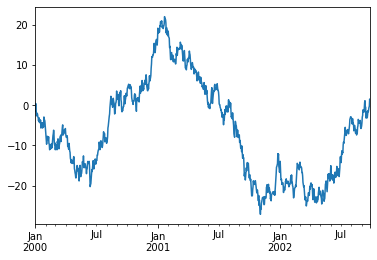

In [0]:
ts = ts.cumsum()
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                columns=['A', 'B', 'C', 'D'])

In [0]:
df

,A,B,C,D
2000-01-01,-0.824037,-0.511052,1.733182,0.747900
2000-01-02,0.064087,1.399225,0.418177,-0.980741
2000-01-03,-0.001171,0.261526,-1.317473,0.719450
2000-01-04,0.476992,-1.697996,-0.198340,-0.174354
2000-01-05,-0.540638,0.432005,-2.029057,0.118525
...,...,...,...,...
2002-09-22,0.638508,1.170233,0.072610,-0.415346
2002-09-23,-0.191605,1.395526,-1.615931,-1.277769
2002-09-24,0.723488,-0.005467,-1.196899,-0.637516
2002-09-25,-0.469235,-0.368916,1.465450,0.634433


DataFrame.cumsum: Return [cumulative sum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html) over DataFrame axis. 

In [0]:
df = df.cumsum()

In [0]:
df

,A,B,C,D
2000-01-01,-0.824037,-0.511052,1.733182,0.747900
2000-01-02,-0.759950,0.888173,2.151359,-0.232841
2000-01-03,-0.761121,1.149698,0.833886,0.486609
2000-01-04,-0.284129,-0.548297,0.635546,0.312255
2000-01-05,-0.824767,-0.116292,-1.393511,0.430780
...,...,...,...,...
2002-09-22,-21.707221,5.098828,46.369733,-1.081652
2002-09-23,-21.898825,6.494354,44.753802,-2.359421
2002-09-24,-21.175338,6.488887,43.556903,-2.996938
2002-09-25,-21.644573,6.119971,45.022354,-2.362505


Plot figures using the [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
) function of matplotlib. figure() is a command to build a figure object.

In [0]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

plot() is a command to plot a graph.

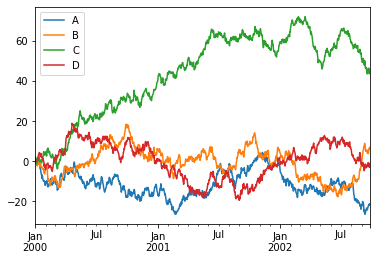

In [0]:
df.plot()

<Figure size 432x288 with 0 Axes>

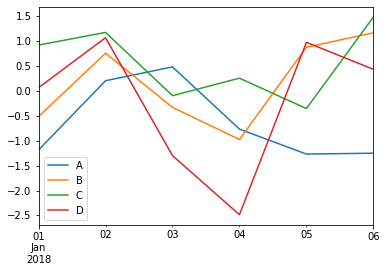

In [0]:
In [140]: plt.figure(); df.plot(); plt.legend(loc='best'); plt.savefig('MyGraph.jpg')

Save the figure into a file. ('eps', 'jpeg', 'jpg', 'pdf', 'png', 'ps', 'svg', 'svgz')

##Getting Data In/Out
###CSV¶
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv).

In [0]:
df.to_csv('MyStudentID.csv')

[Reading from a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table).

In [0]:
pd.read_csv('MyStudentID.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.130623,-1.310471,1.326729,0.752609
1,2000-01-02,-0.310667,-3.446653,2.063317,-0.524478
2,2000-01-03,-0.292145,-3.687443,1.520695,0.282877
3,2000-01-04,-0.234541,-5.499669,0.757260,1.475070
4,2000-01-05,-0.176719,-5.708929,-0.986260,1.181187
...,...,...,...,...,...
995,2002-09-22,44.003564,-22.190696,15.554948,25.011009
996,2002-09-23,43.156580,-22.524208,13.760315,24.470874
997,2002-09-24,44.802496,-21.378867,14.682996,25.399064
998,2002-09-25,45.501537,-21.625400,12.881077,25.045453


###Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel).

Writing to an excel file.

In [0]:
df.to_excel('MyStudentID.xlsx', sheet_name='Sheet1')

Reading from an excel file.

In [0]:
pd.read_excel('MyStudentID.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.130623,-1.310471,1.326729,0.752609
1,2000-01-02,-0.310667,-3.446653,2.063317,-0.524478
2,2000-01-03,-0.292145,-3.687443,1.520695,0.282877
3,2000-01-04,-0.234541,-5.499669,0.757260,1.475070
4,2000-01-05,-0.176719,-5.708929,-0.986260,1.181187
...,...,...,...,...,...
995,2002-09-22,44.003564,-22.190696,15.554948,25.011009
996,2002-09-23,43.156580,-22.524208,13.760315,24.470874
997,2002-09-24,44.802496,-21.378867,14.682996,25.399064
998,2002-09-25,45.501537,-21.625400,12.881077,25.045453


-----

In [0]:
pd.read_excel('CoffeeShop.xlsx', index_col=None, na_values=['NA'])

,Date,Hot,Cold,Beans,Total,Barista
0,2019-01-01,90.0,995.0,NaN,1085,Pen
1,2019-01-02,180.0,200.0,NaN,380,Pen
2,2019-01-03,315.0,235.0,1400.0,1950,Pen
3,2019-01-04,630.0,240.0,250.0,1120,Pen
4,2019-01-05,265.0,450.0,NaN,715,Pen
...,...,...,...,...,...,...
173,2019-06-26,90.0,225.0,NaN,315,Nat
174,2019-06-27,180.0,430.0,NaN,610,Nat
175,2019-06-28,180.0,160.0,NaN,340,Nat
176,2019-06-29,360.0,850.0,NaN,1210,Nat


##Frequently Asked Questions (FAQ)
See [Comparisons](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation.
See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.

-----

#งานท้ายการทดลอง

In [0]:
#!/usr/bin/env python3
#-*- coding: utf-8 -*-

In [1]: import pandas as pd

In [2]: import numpy as np

In [3]: import matplotlib.pyplot as plt

นายกิตติพศ หนูทอง CoE 6135512003 Lab10 sec02


In [0]:
cfs = pd.read_excel('CoffeeShop.xlsx', index_col=None, na_values=['NA'])

In [0]:
cfs

,Date,Hot,Cold,Beans,Barista
0,2019-01-01,90.0,995.0,NaN,Pen
1,2019-01-02,180.0,200.0,NaN,Pen
2,2019-01-03,315.0,235.0,1400.0,Pen
3,2019-01-04,630.0,240.0,250.0,Pen
4,2019-01-05,265.0,450.0,NaN,Pen
...,...,...,...,...,...
173,2019-06-26,90.0,225.0,NaN,Nat
174,2019-06-27,180.0,430.0,NaN,Nat
175,2019-06-28,180.0,160.0,NaN,Nat
176,2019-06-29,360.0,850.0,NaN,Nat



**1. แสดงรายการเฉพาะวันที่ขายเมล็ดกาแฟได้**




In [0]:
cfs[cfs.Beans>0]

,Date,Hot,Cold,Beans,Barista
2,2019-01-03,315.0,235.0,1400.0,Pen
3,2019-01-04,630.0,240.0,250.0,Pen
7,2019-01-08,45.0,510.0,1100.0,Jane
10,2019-01-11,85.0,435.0,1450.0,Jane
11,2019-01-12,85.0,715.0,250.0,Film
13,2019-01-14,360.0,150.0,250.0,Sonja
14,2019-01-15,90.0,365.0,250.0,Sonja
15,2019-01-16,NaN,NaN,3050.0,Sonja
19,2019-01-20,135.0,560.0,700.0,Sonja
22,2019-01-23,85.0,195.0,500.0,Jane


**2. เติม 0 ในช่องที่ไม่มีข้อมูล**

In [0]:
cfs.fillna(value=0)

,Date,Hot,Cold,Beans,Barista
0,2019-01-01,90.0,995.0,0.0,Pen
1,2019-01-02,180.0,200.0,0.0,Pen
2,2019-01-03,315.0,235.0,1400.0,Pen
3,2019-01-04,630.0,240.0,250.0,Pen
4,2019-01-05,265.0,450.0,0.0,Pen
...,...,...,...,...,...
173,2019-06-26,90.0,225.0,0.0,Nat
174,2019-06-27,180.0,430.0,0.0,Nat
175,2019-06-28,180.0,160.0,0.0,Nat
176,2019-06-29,360.0,850.0,0.0,Nat


**3. แสดงสถิติแยกตามบาริสต้า**

In [0]:
bar = cfs.groupby('Barista').sum()

In [0]:
bar

,Hot,Cold,Beans
Barista,,,
Film,300.0,1235.0,250.0
Jane,2780.0,12925.0,9200.0
Kwang,40.0,210.0,4500.0
Mee+,1245.0,5270.0,1500.0
Na,135.0,855.0,250.0
Nat,15245.0,71113.0,30850.0
Pen,1695.0,2925.0,1650.0
Sonja,625.0,2110.0,4250.0


**4. แสดงแผนภูมิแบบแท่งหรือแบบฮิสโตแกรม**

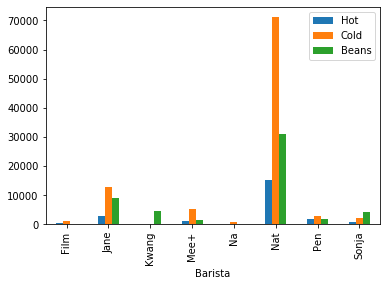

In [0]:
bar.plot.bar();